In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
import csv
cars = pd.read_csv('carsdata.csv', sep=',')

In [41]:
print(cars)

    id               make  price  mpg  rep78  headroom  trunk  weight  length  \
0    1        AMC Concord   4099   22      3       2.5     11    2930     186   
1    2          AMC Pacer   4749   17      3       3.0     11    3350     173   
2    3         AMC Spirit   3799   22    NaN       3.0     12    2640     168   
3    4      Buick Century   4816   20      3       4.5     16    3250     196   
4    5      Buick Electra   7827   15      4       4.0     20    4080     222   
5    6      Buick LeSabre   5788   18      3       4.0     21    3670     218   
6    7         Buick Opel   4453   26    NaN       3.0     10    2230     170   
7    8        Buick Regal   5189   20      3       2.0     16    3280     200   
8    9      Buick Riviera  10372   16      3       3.5     17    3880     207   
9   10      Buick Skylark   4082   19      3       3.5     13    3400     200   
10  11       Cad. Deville  11385   14      3       4.0     20    4330     221   
11  12      Cad. Eldorado  1

In [4]:
cars.price.describe()

count       74.000000
mean      6165.256757
std       2949.495885
min       3291.000000
25%       4220.250000
50%       5006.500000
75%       6332.250000
max      15906.000000
Name: price, dtype: float64

In [5]:
cars.mpg.describe()

count    74.000000
mean     21.297297
std       5.785503
min      12.000000
25%      18.000000
50%      20.000000
75%      24.750000
max      41.000000
Name: mpg, dtype: float64

In [6]:
cars.trunk.describe()

count    74.000000
mean     13.756757
std       4.277404
min       5.000000
25%      10.250000
50%      14.000000
75%      16.750000
max      23.000000
Name: trunk, dtype: float64

In [7]:
cars.length.describe()

count     74.000000
mean     187.932432
std       22.266340
min      142.000000
25%      170.000000
50%      192.500000
75%      203.750000
max      233.000000
Name: length, dtype: float64

In [8]:
cars.weight.describe()

count      74.000000
mean     3019.459459
std       777.193567
min      1760.000000
25%      2250.000000
50%      3190.000000
75%      3600.000000
max      4840.000000
Name: weight, dtype: float64

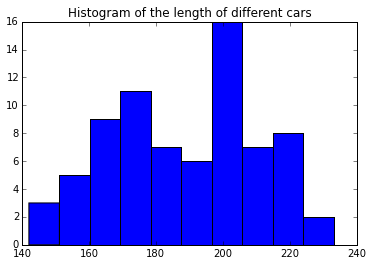

In [49]:
plt.hist(cars.length)
plt.title("Histogram of the length of different cars")
plt.show()

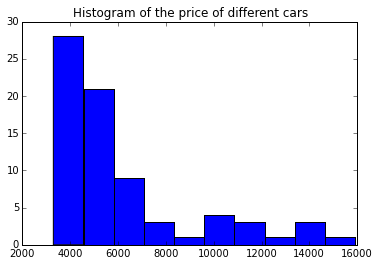

In [50]:
plt.hist(cars.price)
plt.title("Histogram of the price of different cars")
plt.show()

In [11]:
from __future__ import print_function
from statsmodels.compat import lzip
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [12]:
regcar=smf.ols("(price~mpg+weight+length+trunk)", data=cars).fit()

In [13]:
print(regcar.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     9.620
Date:                Tue, 12 May 2015   Prob (F-statistic):           3.05e-06
Time:                        00:37:31   Log-Likelihood:                -679.31
No. Observations:                  74   AIC:                             1369.
Df Residuals:                      69   BIC:                             1380.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    1.49e+04   6080.278      2.450      0.0

In [14]:
np.linalg.cond(regcar.model.exog)

67188.560467773757

In [15]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breushpagan(regcar.resid, regcar.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 24.94736104349403),
 ('p-value', 5.1550825697952692e-05),
 ('f-value', 8.7730647556362449),
 ('f p-value', 8.7255082682523646e-06)]

In [16]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(regcar.resid, regcar.model.exog)
lzip(name, test)

[('F statistic', 1.0433104346825388), ('p-value', 0.45264389027666097)]

In [39]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
import sklearn.cross_validation as cv
import sklearn.grid_search as gs
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
data = cars[['price', 'mpg', 'weight', 'length', 'fd']].copy()
data['fd'] = data['fd'] == 1
data = data.dropna()

In [43]:
data_np = data.astype(np.int32).values
X = data_np[:,:-1]
y = data_np[:,-1]

In [44]:
(X_train, X_test, 
 y_train, y_test) = cv.train_test_split(X, y, test_size=.05)

In [45]:
logreg = lm.LogisticRegression()

In [46]:
logreg.fit(X_train, y_train)
y_predicted = logreg.predict(X_test)

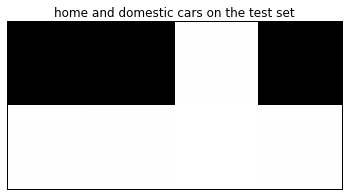

In [47]:
plt.figure(figsize=(8, 3));
plt.imshow(np.vstack((y_test, y_predicted)),
           interpolation='none', cmap='bone');
plt.xticks([]); plt.yticks([]);
plt.title(("home and domestic cars"
          " on the test set"));

In [48]:
cv.cross_val_score(logreg, X, y)

array([ 0.64 ,  0.56 ,  0.625])